In [ ]:
import sys

def custom_exc(shell, etype, value, tb, tb_offset=None):
    print("Problem: {}".format(value), file=sys.stderr)
    return None

get_ipython().set_custom_exc((AssertionError,), custom_exc)

In [1]:
import kechain2.client

c = kechain2.client.Client()
c.parts()

LoginRequiredError: 

In [2]:
import kechain2.client

c = kechain2.client.Client()
c.login('admin', 'pass')
c.parts()

Part,ID
Bike Project,73c78109-4a34-463b-8823-3fc734b26218
Product,ed261cc2-e417-414a-aef5-946df8817b29
Bike,a8751a67-ce63-4308-81a7-e47712376782
Frame,bf369bb8-b649-4bc9-ba7a-f35e357f4711
Front Fork,2fcec18c-dd4d-4cd4-89d8-3db04147c30f
Seat,7ede1e33-e224-41a0-87a0-6a5f151991b3
Front Wheel,fe1b868a-894a-406f-a78d-33e57578a2e9
Rear Wheel,6f773001-5b7e-452d-a46b-c98361170753
Wheel,0a9f15e1-2942-4d85-b5e0-bf06b324ba1e
Wheel,4241e502-bcfa-4360-a477-08fe6ec56b33


In [3]:
import kechain2.client

c = kechain2.client.Client()
c.login(token="e920094902818b26feb4fac3dfa2904fff88649c")
c.parts()

Part,ID
Bike Project,73c78109-4a34-463b-8823-3fc734b26218
Product,ed261cc2-e417-414a-aef5-946df8817b29
Bike,a8751a67-ce63-4308-81a7-e47712376782
Frame,bf369bb8-b649-4bc9-ba7a-f35e357f4711
Front Fork,2fcec18c-dd4d-4cd4-89d8-3db04147c30f
Seat,7ede1e33-e224-41a0-87a0-6a5f151991b3
Front Wheel,fe1b868a-894a-406f-a78d-33e57578a2e9
Rear Wheel,6f773001-5b7e-452d-a46b-c98361170753
Wheel,0a9f15e1-2942-4d85-b5e0-bf06b324ba1e
Wheel,4241e502-bcfa-4360-a477-08fe6ec56b33


In [4]:
import kechain2

kechain2.login(token="e920094902818b26feb4fac3dfa2904fff88649c")
kechain2.parts()

Part,ID
Bike Project,73c78109-4a34-463b-8823-3fc734b26218
Product,ed261cc2-e417-414a-aef5-946df8817b29
Bike,a8751a67-ce63-4308-81a7-e47712376782
Frame,bf369bb8-b649-4bc9-ba7a-f35e357f4711
Front Fork,2fcec18c-dd4d-4cd4-89d8-3db04147c30f
Seat,7ede1e33-e224-41a0-87a0-6a5f151991b3
Front Wheel,fe1b868a-894a-406f-a78d-33e57578a2e9
Rear Wheel,6f773001-5b7e-452d-a46b-c98361170753
Wheel,0a9f15e1-2942-4d85-b5e0-bf06b324ba1e
Wheel,4241e502-bcfa-4360-a477-08fe6ec56b33


In [6]:
front_wheel = kechain2.part('Front Wheel')
diameter = front_wheel.property('Diameter')
diameter.value = 100

In [7]:
kechain2.part('Bike').property('Gears').value

99999

In [8]:
kechain2.parts('Bike', category=None)

Part,Category,ID
Bike,MODEL,df504613-7bca-428a-974f-e1f8aee933f3
Bike,INSTANCE,a8751a67-ce63-4308-81a7-e47712376782


In [9]:
project = kechain2.scope('Bike Project')
project.part('Frame')

AttributeError: module 'kechain2' has no attribute 'scope'

In [10]:
project.parts(model=project.model('Wheel'))

NameError: name 'project' is not defined

In [ ]:
from IPython.display import display

task = kechain2.activity("Specify wheel diameter")

for p in task.parts():        
    display(p)

In [ ]:
kechain2.properties('Diameter')[1].part.property('Spokes').value = 200

In [ ]:
wheel = kechain2.model('Wheel')
bike = kechain2.part('Bike')

bike.add(wheel)

In [ ]:
import math
import random

wheel_model = kechain2.part(name='Wheel', category='MODEL')
wheels = kechain2.parts(model=wheel_model)

for wheel in wheels:
    num_spokes = random.randint(1, 10)
    noise = random.random() * 3
    
    wheel.property('Spokes').value = num_spokes
    wheel.property('Diameter').value = 10 * math.sin(num_spokes) + noise

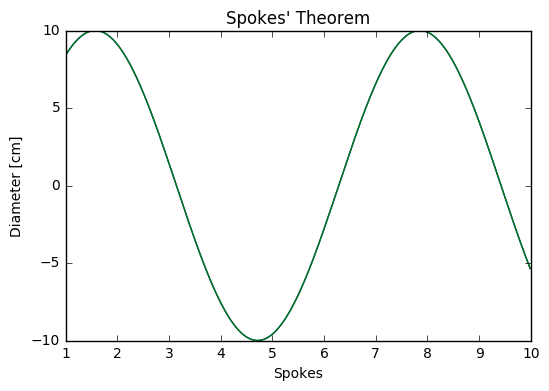

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 10, 0.01)
y = 10 * np.sin(x)
plt.plot(x, y)

#wheels = kechain2.parts(model=kechain2.model('Wheel'))
#plt.plot(wheels['Spokes'], wheels['Diameter'], 'd', markersize=10)

plt.xlabel('Spokes')
plt.ylabel('Diameter [cm]')
plt.title('Spokes\' Theorem')

kechain2.part('Bike').property('Picture').value = plt.gcf()

plt.show()

In [ ]:
wheels = kechain2.parts(model=kechain2.model('Wheel'))

wheels.values('Diameter')